# Goore Game

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import automata
from automata import Tsetlin, GooreGame, Lri

In [2]:
l1=Lri()
print(l1)

P: [0.5, 0.5], Action: 0, kr: 0.9


In [3]:
t1=Tsetlin()
print(t1)

N: 3, Current State: 3, Action: 0


In [4]:
gg=GooreGame()
print(gg)

N: 3, Current State: 3, Action: 0
N: 3, Current State: 3, Action: 0
N: 3, Current State: 3, Action: 0
N: 3, Current State: 3, Action: 0
N: 3, Current State: 3, Action: 0
N: 3, Current State: 6, Action: 1
N: 3, Current State: 3, Action: 0
N: 3, Current State: 6, Action: 1
N: 3, Current State: 6, Action: 1
N: 3, Current State: 6, Action: 1


## Simulations

### Tsetlin

#### Single Experiment

In [2]:
# run to convergence
theta_opt=0.9
gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=50, n_voters=10)
thetas=[]
num_steps=10000
penalties=[]
for step in range(num_steps):
    gg.step()
    thetas.append(gg.theta)
    penalties.append(gg.p_pen)

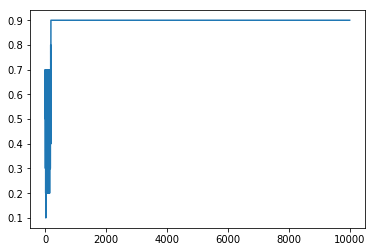

In [17]:
plt.plot(thetas)
plt.show()

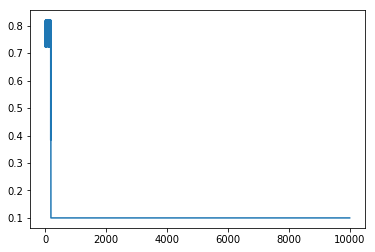

In [15]:
plt.plot(penalties)
plt.show()

#### Ensemble Average

In [13]:
num_exps=100
final_thetas=[]
final_penalties=[]
theta_opt=0.7
max_steps=1000
steps_to_conv=[]

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=100, n_voters=100)
    num_steps=0
    while (not gg.converged) and (num_steps<max_steps):
        num_steps=num_steps+1
        gg.step()
    final_thetas.append(gg.theta)
    final_penalties.append(gg.p_pen)
    steps_to_conv.append(num_steps)
    print("exp: "+str(exp)+" theta: "+str(gg.theta)+" p(pen): "+str(gg.p_pen)+" num steps: "+str(num_steps))
    

exp: 0 theta: 0.7 p(pen): 0.1 num steps: 138
exp: 1 theta: 0.7 p(pen): 0.1 num steps: 136
exp: 2 theta: 0.7 p(pen): 0.1 num steps: 135
exp: 3 theta: 0.7 p(pen): 0.1 num steps: 139
exp: 4 theta: 0.7 p(pen): 0.1 num steps: 144
exp: 5 theta: 0.7 p(pen): 0.1 num steps: 145
exp: 6 theta: 0.7 p(pen): 0.1 num steps: 129
exp: 7 theta: 0.7 p(pen): 0.1 num steps: 150
exp: 8 theta: 0.7 p(pen): 0.1 num steps: 128
exp: 9 theta: 0.7 p(pen): 0.1 num steps: 134
exp: 10 theta: 0.7 p(pen): 0.1 num steps: 148
exp: 11 theta: 0.7 p(pen): 0.1 num steps: 134
exp: 12 theta: 0.7 p(pen): 0.1 num steps: 140
exp: 13 theta: 0.7 p(pen): 0.1 num steps: 134
exp: 14 theta: 0.8 p(pen): 0.383147782506 num steps: 540
exp: 15 theta: 0.7 p(pen): 0.1 num steps: 150
exp: 16 theta: 0.7 p(pen): 0.1 num steps: 162
exp: 17 theta: 0.7 p(pen): 0.1 num steps: 131
exp: 18 theta: 0.7 p(pen): 0.1 num steps: 148
exp: 19 theta: 0.7 p(pen): 0.1 num steps: 145
exp: 20 theta: 0.7 p(pen): 0.1 num steps: 132
exp: 21 theta: 0.7 p(pen): 0.1 nu

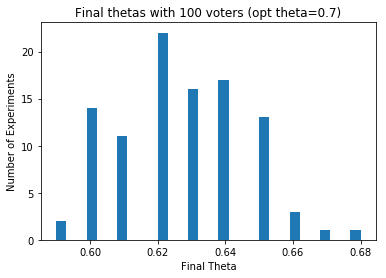

In [12]:
#final_thetas1=final_thetas
plt.hist(final_thetas, bins=30)
plt.title("Final thetas with 100 voters (opt theta=0.7)")
plt.ylabel("Number of Experiments")
plt.xlabel("Final Theta")
plt.savefig("100voters.png")
plt.show()

In [4]:
num_exps=100
final_thetas=[]
final_penalties=[]
theta_opt=0.7
max_steps=1000
steps_to_conv=[]

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=100, n_voters=10)
    num_steps=0
    while (not gg.converged) and (num_steps<max_steps):
        num_steps=num_steps+1
        gg.step()
    final_thetas.append(gg.theta)
    final_penalties.append(gg.p_pen)
    steps_to_conv.append(num_steps)
    #print("exp: "+str(exp)+" theta: "+str(gg.theta)+" p(pen): "+str(gg.p_pen)+" num steps: "+str(num_steps))
 

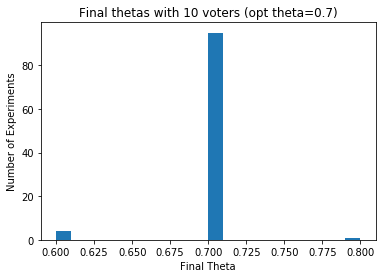

In [9]:
plt.hist(final_thetas, bins=20)
plt.title("Final thetas with 10 voters (opt theta=0.7)")
plt.ylabel("Number of Experiments")
plt.xlabel("Final Theta")
plt.savefig("10voters.png")
plt.show()

### N vs Error in Theta

In [18]:
# for varying N, test with 10 voters, plot distance from mean

test_Ns=np.arange(3, 100, 2)
theta_errs=[]

for N in test_Ns:
    num_exps=100
    final_thetas=[]
    final_penalties=[]
    theta_opt=0.7
    max_steps=1000
    steps_to_conv=[]

    for exp in range(num_exps):
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=N, n_voters=10)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_thetas.append(gg.theta)
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(abs(theta_opt-sum(final_thetas)/len(final_thetas)))
    print("N: "+str(N)+" thetas: "+str(sum(final_thetas)/len(final_thetas)))
     

N: 3 thetas: 0.7000000000000013
N: 5 thetas: 0.7010000000000012
N: 7 thetas: 0.6990000000000013
N: 9 thetas: 0.6990000000000012
N: 11 thetas: 0.7000000000000013
N: 13 thetas: 0.6960000000000012
N: 15 thetas: 0.6980000000000013
N: 17 thetas: 0.7010000000000012
N: 19 thetas: 0.6970000000000013
N: 21 thetas: 0.6960000000000014
N: 23 thetas: 0.6970000000000013
N: 25 thetas: 0.6980000000000011
N: 27 thetas: 0.6960000000000012
N: 29 thetas: 0.6990000000000012
N: 31 thetas: 0.6980000000000013
N: 33 thetas: 0.6940000000000012
N: 35 thetas: 0.6980000000000013
N: 37 thetas: 0.6960000000000012
N: 39 thetas: 0.6970000000000012
N: 41 thetas: 0.6990000000000012
N: 43 thetas: 0.6950000000000013
N: 45 thetas: 0.6950000000000013
N: 47 thetas: 0.6970000000000013
N: 49 thetas: 0.6950000000000013
N: 51 thetas: 0.6960000000000012
N: 53 thetas: 0.6970000000000012
N: 55 thetas: 0.6980000000000013
N: 57 thetas: 0.7020000000000013
N: 59 thetas: 0.6980000000000013
N: 61 thetas: 0.6960000000000011
N: 63 thetas: 

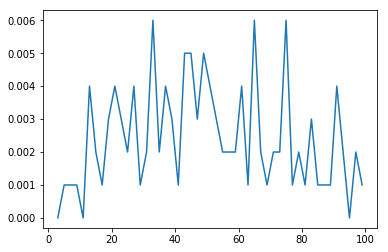

In [19]:
plt.plot(test_Ns, theta_errs)
plt.show()

In [20]:
# for varying N, test with 10 voters, plot distance from mean

test_Ns=np.arange(3, 100, 5)
theta_errs=[]

for N in test_Ns:
    num_exps=100
    final_thetas=[]
    final_penalties=[]
    theta_opt=0.7
    max_steps=1000
    steps_to_conv=[]

    for exp in range(num_exps):
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=N, n_voters=100)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_thetas.append(gg.theta)
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(abs(theta_opt-sum(final_thetas)/len(final_thetas)))
    print("N: "+str(N)+" thetas: "+str(sum(final_thetas)/len(final_thetas)))

N: 3 thetas: 0.564
N: 8 thetas: 0.6373000000000004
N: 13 thetas: 0.6334999999999998
N: 18 thetas: 0.6279999999999999
N: 23 thetas: 0.6262000000000001
N: 28 thetas: 0.6324000000000001
N: 33 thetas: 0.6276
N: 38 thetas: 0.6275000000000001
N: 43 thetas: 0.6271000000000001
N: 48 thetas: 0.6284999999999998
N: 53 thetas: 0.6325
N: 58 thetas: 0.6313999999999999
N: 63 thetas: 0.6298999999999999
N: 68 thetas: 0.6244999999999998
N: 73 thetas: 0.6273000000000001
N: 78 thetas: 0.6285
N: 83 thetas: 0.6304999999999998
N: 88 thetas: 0.6279000000000002
N: 93 thetas: 0.6295000000000001
N: 98 thetas: 0.6312000000000001


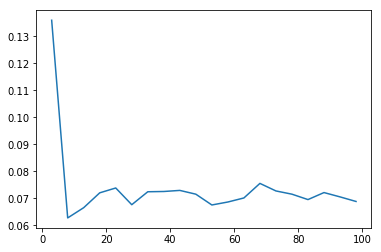

In [21]:
plt.plot(test_Ns, theta_errs)
plt.show()

### Voters vs Error in Theta

In [26]:
# for varying numbers of voters, test with N=20, plot distance from mean

test_num_voters=np.arange(3, 100, 2)
theta_errs=[]

for num_voters in test_num_voters:
    num_exps=100
    final_thetas=[]
    final_penalties=[]
    theta_opt=0.7
    max_steps=1000
    steps_to_conv=[]

    for exp in range(num_exps):
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=10, n_voters=num_voters)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_thetas.append(gg.theta)
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(abs(theta_opt-sum(final_thetas)/len(final_thetas)))
    print("num_voters: "+str(num_voters)+" thetas: "+str(sum(final_thetas)/len(final_thetas)))

num_voters: 3 thetas: 0.666666666667
num_voters: 5 thetas: 0.678
num_voters: 7 thetas: 0.714285714286
num_voters: 9 thetas: 0.682222222222
num_voters: 11 thetas: 0.692727272727
num_voters: 13 thetas: 0.690769230769
num_voters: 15 thetas: 0.690666666667
num_voters: 17 thetas: 0.681176470588
num_voters: 19 thetas: 0.680526315789
num_voters: 21 thetas: 0.681428571429
num_voters: 23 thetas: 0.679565217391
num_voters: 25 thetas: 0.6748
num_voters: 27 thetas: 0.677037037037
num_voters: 29 thetas: 0.669655172414
num_voters: 31 thetas: 0.665161290323
num_voters: 33 thetas: 0.665757575758
num_voters: 35 thetas: 0.667428571429
num_voters: 37 thetas: 0.663513513514
num_voters: 39 thetas: 0.661025641026
num_voters: 41 thetas: 0.654390243902
num_voters: 43 thetas: 0.65488372093
num_voters: 45 thetas: 0.658
num_voters: 47 thetas: 0.651063829787
num_voters: 49 thetas: 0.647346938776
num_voters: 51 thetas: 0.646666666667
num_voters: 53 thetas: 0.650377358491
num_voters: 55 thetas: 0.646545454545
num_v

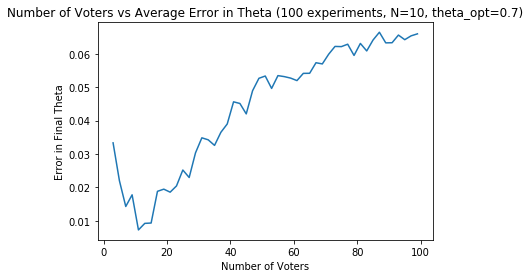

In [27]:
plt.plot(test_num_voters, theta_errs)
plt.title("Number of Voters vs Average Error in Theta (100 experiments, N=10, theta_opt=0.7)")
plt.xlabel("Number of Voters")
plt.ylabel("Error in Final Theta")
plt.savefig("numvotervserror07.png")
plt.show()

In [24]:
# for varying N, test with 10 voters, plot distance from mean
# generate a new theta opt for each experiment

test_num_voters=np.arange(3, 100, 2)
theta_errs=[]

for num_voters in test_num_voters:
    num_exps=100
    final_theta_errors=[]
    final_penalties=[]
    #theta_opt=0.7
    max_steps=10000
    steps_to_conv=[]

    for exp in range(num_exps):
        theta_opt=random.uniform(0,1)
        gg=GooreGame(theta_opt=theta_opt, automata="Tsetlin", N=10, n_voters=num_voters)
        num_steps=0
        while (not gg.converged) and (num_steps<max_steps):
            num_steps=num_steps+1
            gg.step()
        final_theta_errors.append(abs(gg.theta-theta_opt))
        final_penalties.append(gg.p_pen)
        steps_to_conv.append(num_steps)
    
    theta_errs.append(sum(final_theta_errors)/len(final_theta_errors))
    print("num_voters: "+str(num_voters)+" theta errors: "+str(sum(final_theta_errors)/len(final_theta_errors)))

num_voters: 3 theta errors: 0.141632140246
num_voters: 5 theta errors: 0.0515109070483
num_voters: 7 theta errors: 0.0413548665256
num_voters: 9 theta errors: 0.0323796253184
num_voters: 11 theta errors: 0.0442462623688
num_voters: 13 theta errors: 0.0555105640614
num_voters: 15 theta errors: 0.0632300085518
num_voters: 17 theta errors: 0.0976348590508
num_voters: 19 theta errors: 0.0878071628045
num_voters: 21 theta errors: 0.153552979196
num_voters: 23 theta errors: 0.0977412863826
num_voters: 25 theta errors: 0.115787511474
num_voters: 27 theta errors: 0.12979589468
num_voters: 29 theta errors: 0.123330641849
num_voters: 31 theta errors: 0.145478249805
num_voters: 33 theta errors: 0.150564634648
num_voters: 35 theta errors: 0.138455386972
num_voters: 37 theta errors: 0.217173850701
num_voters: 39 theta errors: 0.164994228786
num_voters: 41 theta errors: 0.159381158269
num_voters: 43 theta errors: 0.186737625179
num_voters: 45 theta errors: 0.16114252429
num_voters: 47 theta errors: 

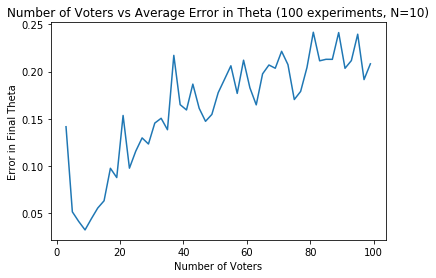

In [25]:
plt.plot(test_num_voters, theta_errs)
plt.title("Number of Voters vs Average Error in Theta (100 experiments, N=10)")
plt.xlabel("Number of Voters")
plt.ylabel("Error in Final Theta")
plt.savefig("numvotervserror.png")
plt.show()

### Lri

#### Single Experiment

In [6]:
# run to convergence
gg=GooreGame(theta_opt=0.7, automata="Lri", n_voters=10, g_mod="bimod")
thetas=[]
num_steps=5000
penalties=[]
for step in range(num_steps):
    gg.step()
    thetas.append(gg.theta)
    penalties.append(gg.p_pen)

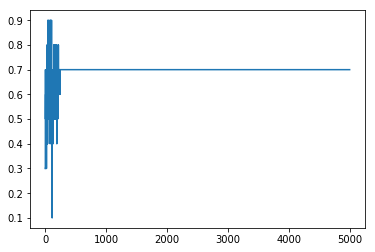

In [7]:
plt.plot(thetas)
plt.show()

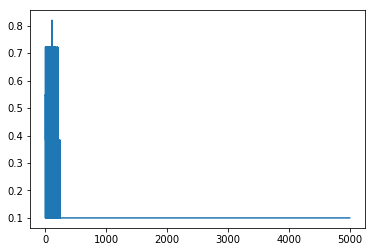

In [8]:
plt.plot(penalties)
plt.show()

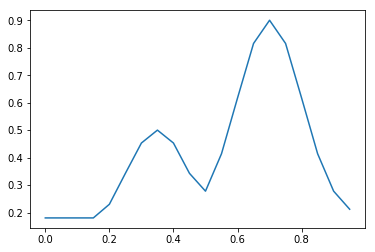

In [5]:
thetas=np.arange(0,1, 0.05)
plt.plot(thetas, [gg.bimod_g(theta) for theta in thetas])
plt.show()

#### Ensemble Average

In [8]:
num_exps=100
final_thetas_lri=[]
final_penalties_lri=[]
theta_opt=0.7
num_voters=10

max_steps=5000
steps_to_conv=[]

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Lri", kr=0.95, n_voters=num_voters)
    num_steps=0
    while (not gg.converged) and (num_steps<max_steps):
        num_steps=num_steps+1
        gg.step()
    final_thetas_lri.append(gg.theta)
    final_penalties_lri.append(gg.p_pen)
    steps_to_conv.append(num_steps)

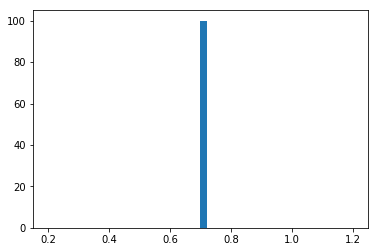

In [9]:
plt.hist(final_thetas_lri, bins=50)
plt.show()

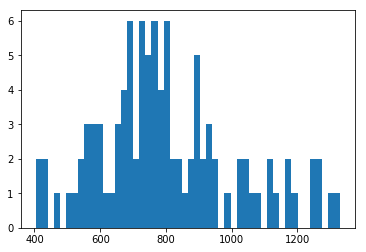

In [11]:
plt.hist(steps_to_conv, bins=50)
plt.show()

#### Error in Theta at Each Step

In [13]:
num_exps=100
final_thetas_lri=[]
final_penalties_lri=[]
theta_opt=0.7
num_voters=10

max_steps=5000
steps_to_conv=[]
step_errors=np.zeros(max_steps)

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Lri", kr=0.95, n_voters=num_voters)
    num_steps=0
    #while (not gg.converged) and (num_steps<max_steps):
    while num_steps<max_steps:
        step_errors[num_steps]=step_errors[num_steps]+abs(theta_opt-gg.theta)/num_exps
        num_steps=num_steps+1
        gg.step()
    final_thetas_lri.append(gg.theta)
    final_penalties_lri.append(gg.p_pen)
    steps_to_conv.append(num_steps)
    print("exp: "+str(exp)+" final theta"+str(gg.theta))

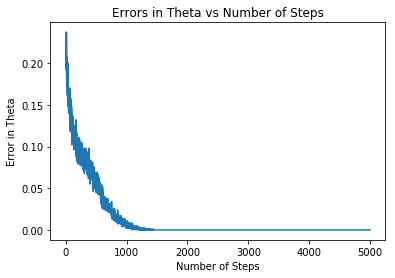

In [15]:
plt.plot(step_errors)
plt.title("Errors in Theta vs Number of Steps")
plt.ylabel("Error in Theta")
plt.xlabel("Number of Steps")
plt.show()

#### Error in Theta at Each Step With Bimodal G

In [9]:
num_exps=100
final_thetas_lri=[]
final_penalties_lri=[]
theta_opt=0.7
num_voters=10

max_steps=5000
steps_to_conv=[]
step_errors=np.zeros(max_steps)

for exp in range(num_exps):
    gg=GooreGame(theta_opt=theta_opt, automata="Lri", kr=0.95, n_voters=num_voters, g_mod="bimod")
    num_steps=0
    #while (not gg.converged) and (num_steps<max_steps):
    while num_steps<max_steps:
        step_errors[num_steps]=step_errors[num_steps]+abs(theta_opt-gg.theta)/num_exps
        num_steps=num_steps+1
        gg.step()
    final_thetas_lri.append(gg.theta)
    final_penalties_lri.append(gg.p_pen)
    steps_to_conv.append(num_steps)
    print("exp: "+str(exp)+" final theta: "+str(gg.theta))

exp: 0 final theta: 0.8
exp: 1 final theta: 0.8
exp: 2 final theta: 0.8
exp: 3 final theta: 0.8
exp: 4 final theta: 0.8
exp: 5 final theta: 0.8
exp: 6 final theta: 0.8
exp: 7 final theta: 0.8
exp: 8 final theta: 0.8
exp: 9 final theta: 0.8
exp: 10 final theta: 0.8
exp: 11 final theta: 0.8
exp: 12 final theta: 0.8
exp: 13 final theta: 0.8
exp: 14 final theta: 0.8
exp: 15 final theta: 0.8
exp: 16 final theta: 0.8
exp: 17 final theta: 0.8
exp: 18 final theta: 0.8
exp: 19 final theta: 0.8
exp: 20 final theta: 0.8
exp: 21 final theta: 0.8
exp: 22 final theta: 0.8
exp: 23 final theta: 0.8
exp: 24 final theta: 0.8
exp: 25 final theta: 0.8
exp: 26 final theta: 0.8
exp: 27 final theta: 0.8
exp: 28 final theta: 0.8
exp: 29 final theta: 0.8
exp: 30 final theta: 0.8
exp: 31 final theta: 0.8
exp: 32 final theta: 0.8
exp: 33 final theta: 0.8
exp: 34 final theta: 0.8
exp: 35 final theta: 0.8
exp: 36 final theta: 0.8
exp: 37 final theta: 0.8
exp: 38 final theta: 0.8
exp: 39 final theta: 0.8
exp: 40 fi

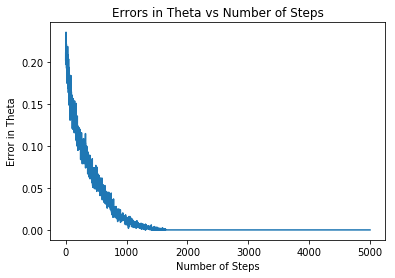

In [3]:
plt.plot(step_errors)
plt.title("Errors in Theta vs Number of Steps")
plt.ylabel("Error in Theta")
plt.xlabel("Number of Steps")
plt.show()